In [154]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.DataFrame()
df = tabula.read_pdf("2014-2015.pdf", pages="all", multiple_tables=True)

In [155]:
categories = []

In [156]:
publications = df[0]
categories.append(publications)

In [157]:
student_activity_groups = df[1:7]
categories.append(student_activity_groups)

In [158]:
student_initiated_service_groups = df[7:11]
categories.append(student_initiated_service_groups)

In [159]:
programs = df[11]
categories.append(programs)

In [160]:
operations = df[12]
categories.append(operations)

In [161]:
lead_center = df[13]
categories.append(operations)

In [162]:
president_office = df[14]
categories.append(president_office)

In [163]:
evp_office = df[15:17]
categories.append(evp_office)

In [164]:
eavp_office = df[17]
categories.append(eavp_office)

In [165]:
aavp_office = df[18]
categories.append(aavp_office)

In [166]:
osa_office = df[19]
categories.append(osa_office)

In [167]:
appointed_officials = df[20:22]
categories.append(appointed_officials)

In [168]:
senate = df[22]
categories.append(senate)

In [169]:
asuc_total = df[23]
categories.append(asuc_total)

In [170]:
graduate_assembly = df[24]
categories.append(graduate_assembly)

In [171]:
totals = df[25]
categories.append(totals)

In [172]:
appointed_officials

[                                   0     1                2                3  \
 0                APPOINTED OFFICIALS  Type  Funding Request  Finance Officer   
 1                   Attorney General    AG              NaN        $1,000.00   
 2  Commissioner of Diversity Affairs   CDA              NaN        $1,000.00   
 
                    4                 5  
 0  Finance Committee  Final Allocation  
 1          $1,000.00         $1,000.00  
 2          $1,000.00         $1,000.00  ,
                                           0    1        2           3  \
 0                       Comptroller General   CG      NaN   $1,000.00   
 1                          Election Council   EC      NaN  $20,000.00   
 2                           Finance Officer   FO      NaN   $1,500.00   
 3                          Judicial Council   JC  $750.00     $750.00   
 4     Marketing and Communications Director  MCD      NaN   $1,000.00   
 5  (Under MCD) Marketing and Communications  MCD      NaN   

In [173]:
def process_df_group(df_start_index, df_end_index=None):
    """
    takes in indices of df and returns processed df
    """
    # select df groups
    if df_end_index == None:
        df_spliced = df[df_start_index] 

        # set first row as header
        df_spliced.columns = df_spliced.iloc[0]
        df_spliced = df_spliced.reindex(df_spliced.index.drop(0))
    else:
        df_spliced_multiple = df[df_start_index:df_end_index]
        
        for i in range(len(df_spliced_multiple)):
            df_spliced_multiple[i] = df_spliced_multiple[i].dropna(axis=1, how='all')
            
        # set first row as header
        df_columns = df_spliced_multiple[0].iloc[0]
        #print('Cols', df_columns)
        df_spliced_multiple[0] = df_spliced_multiple[0].reindex(df_spliced_multiple[0].index.drop(0))
        
        #print(df_spliced_multiple[0])
        for i in range(1, len(df_spliced_multiple)):
            #print('Next Cols', df_spliced_multiple[i].columns)
            df_spliced_multiple[i].columns = df_columns
        
        df_spliced = pd.concat(df_spliced_multiple)
            
    #print('-------')

    # columns to parse dollar values
    dollar_cols = ['Funding Request', 'Finance Officer', 'Finance Committee', 'Final Allocation'] 

    # convert dollar values to float values
    for col in dollar_cols:
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace('$', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace(',', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: float(x))

    df_spliced = df_spliced.astype(float, raise_on_error=False)
        
    # remove last row (subtotal row)
    df_spliced = df_spliced[:-1]
    
    # add column for difference between allocation and request
    df_spliced['Difference'] = df_spliced['Final Allocation'] - df_spliced['Funding Request']
    
    # rename first column from organization type to club name
    df_spliced.columns.values[0] = 'Name'
    
    return df_spliced


In [174]:
# categories = list of dataframes for each major category
categories = []

category_names = ['publications', 'student_activity_groups', 'student_initiated_service_groups', 'programs',
                 'operations', 'lead_center', 'president_office', 'evp_office', 'eavp_office', 'aavp_office',
                 'osa_office', 'appointed_officials', 'senate', 'asuc_total', 'graduate_assembly', 'totals']
category_splices = [[0, None], [1, 7], [7, 11], [11, None], [12, None], [13, None], [14, None]]
"""
TODO
other values not processed
[15, 17], [17, None],
           [18, None], [19, None], [20 ,22], [22, None], [23, None], [24, None], [25, None]]
"""
for splice in category_splices:
    print(splice)
    categories.append(process_df_group(splice[0], splice[1]))

print('-------------------------------------------------------')
print(categories[0])

[0, None]
[1, 7]


/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)
/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:37: RuntimeWarning: unorderable types: int() > str(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)
/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:37: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)


[7, 11]
[11, None]
[12, None]
[13, None]
[14, None]
-------------------------------------------------------
0                                                Name Type  \
1                                            Al-Bayan  PUB   
2                 Alternative Breaks Publishing Group  PUB   
3                                       BARE Magazine  PUB   
4                             Berkeley Fiction Review  PUB   
5                              Berkeley Poetry Review  PUB   
6                           Berkeley Political Review  PUB   
7                             Berkeley Science Review  PUB   
8                                Blue & Gold Yearbook  PUB   
9                                              B-Side  PUB   
10                                   byte of Berkeley  PUB   
11                   Cal Literature and Arts Magazine  PUB   
12                                   Caliber Magazine  PUB   
13                                 California Patriot  PUB   
14                      

In [175]:
def join_pages(lst_df):
    if type(lst_df) != list:
        return lst_df
    df = lst_df[0]
    for i in range(1,len(lst_df)):
        df = df.append(lst_df[i])
    return df

In [176]:
joined_categories = list(map(join_pages, categories))

# Money Allocated by Organization Type

Each Org and Clubs + Amounts Received

PUB


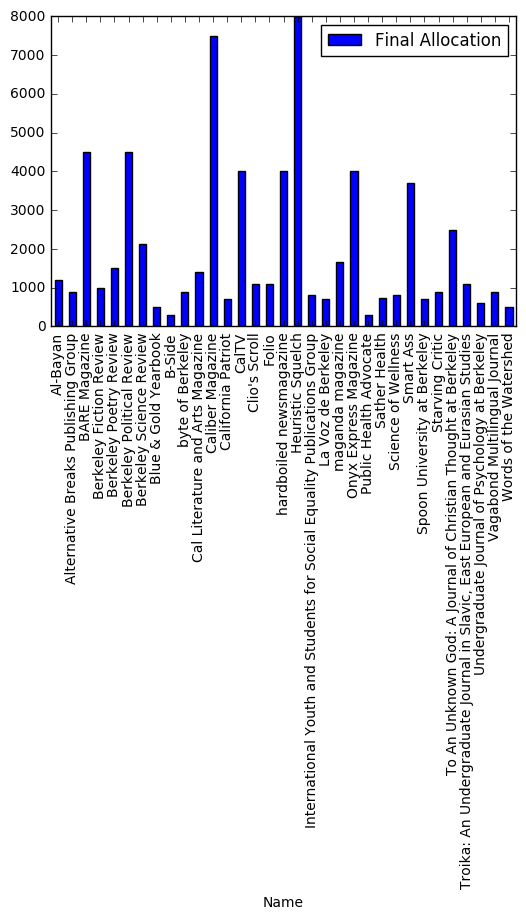

1    NaN
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


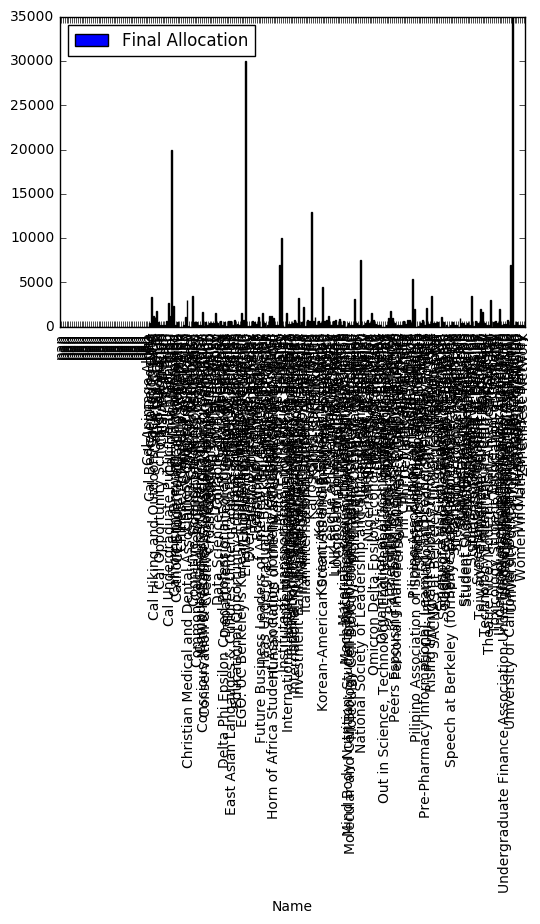

1     NaN
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


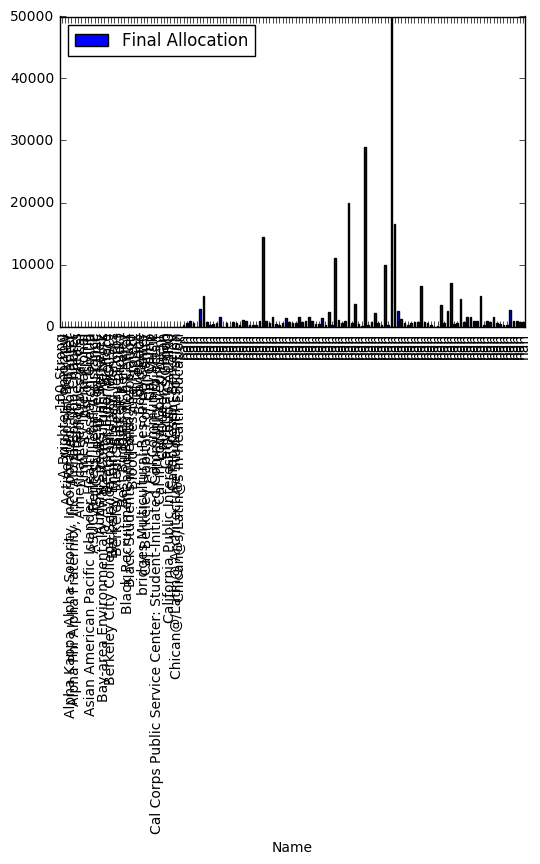

ASUC


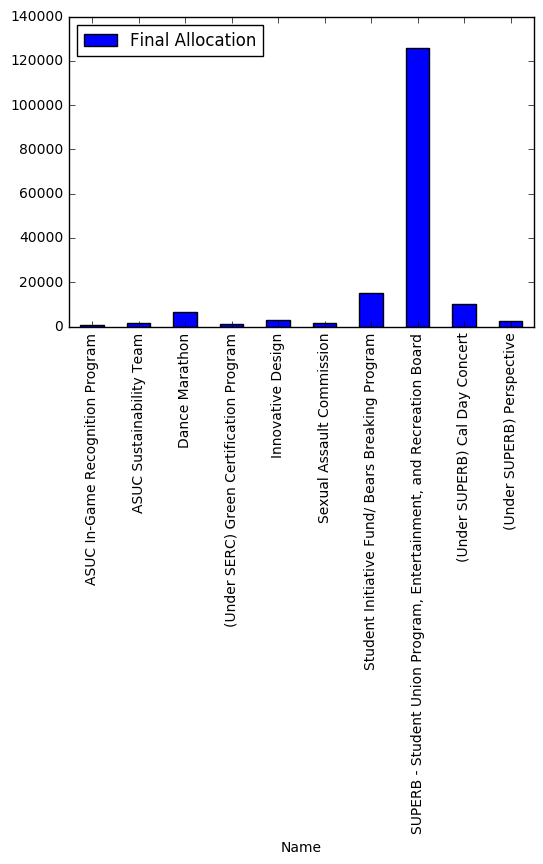

ASUC


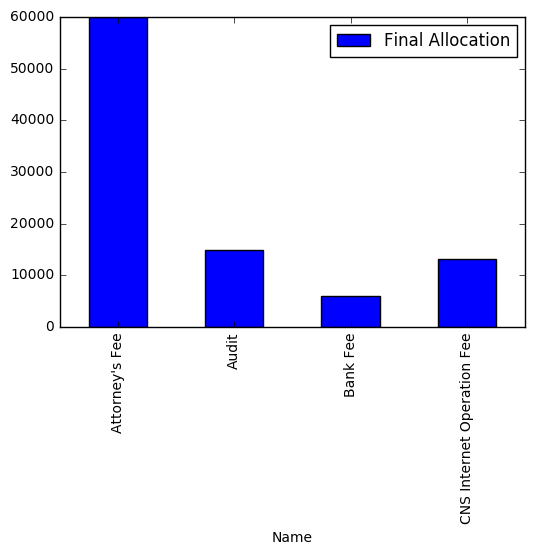

LEAD


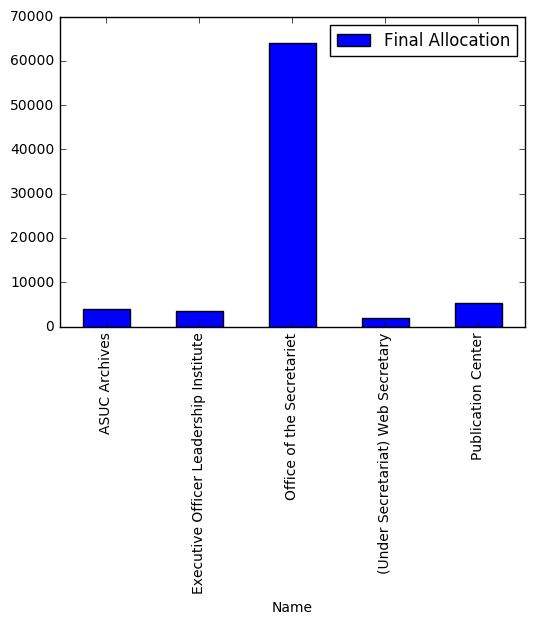

OP


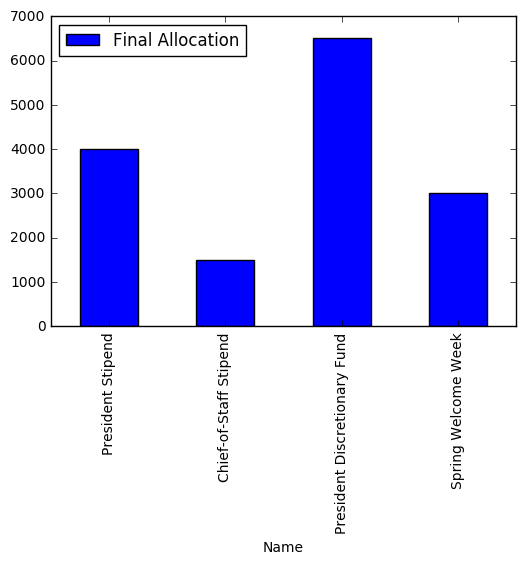

In [177]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    plt.figure()
    categories[i].plot.bar(x='Name',y='Final Allocation')
    plt.show()

Roll Up on Org

# Money Requested by Organization Type

Each Org and Clubs + Amounts Requested

PUB


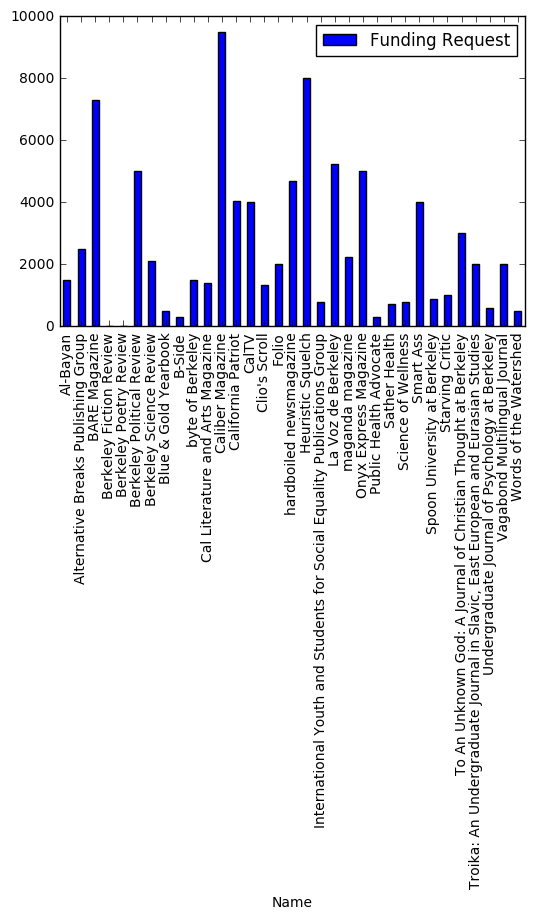

1    NaN
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


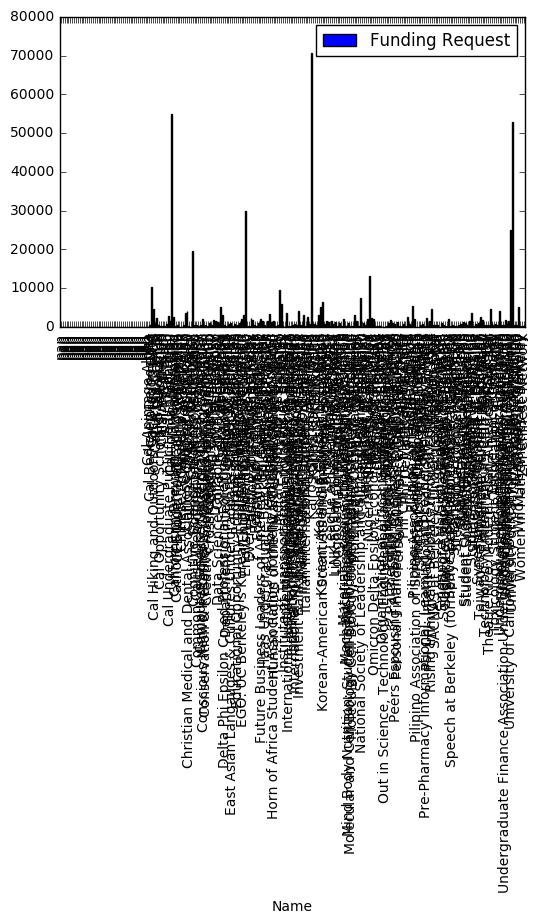

1     NaN
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


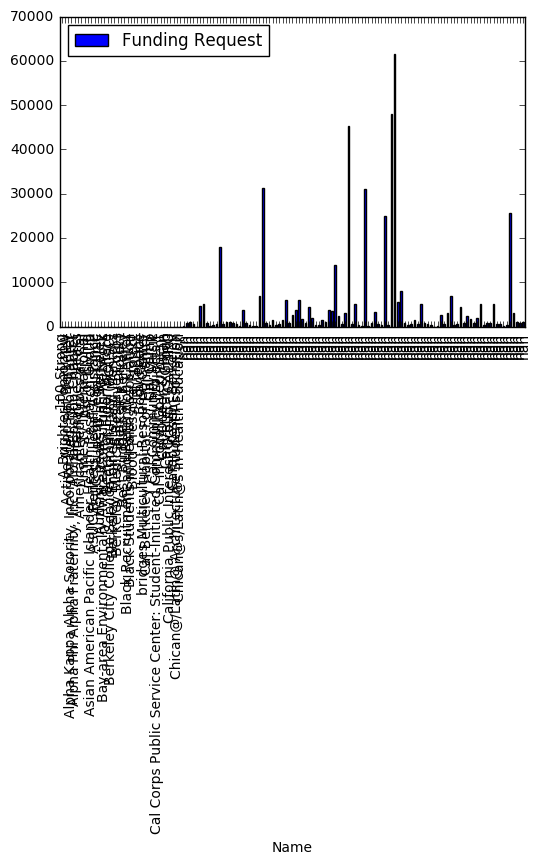

ASUC


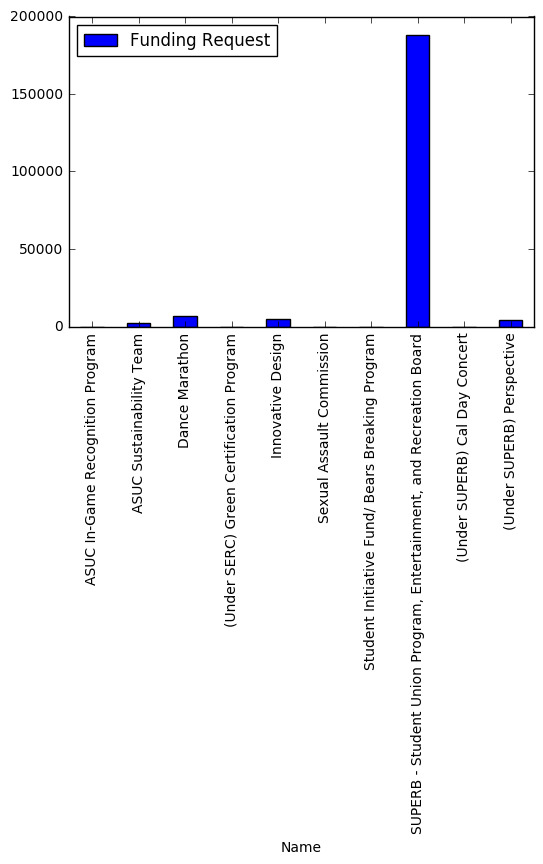

ASUC


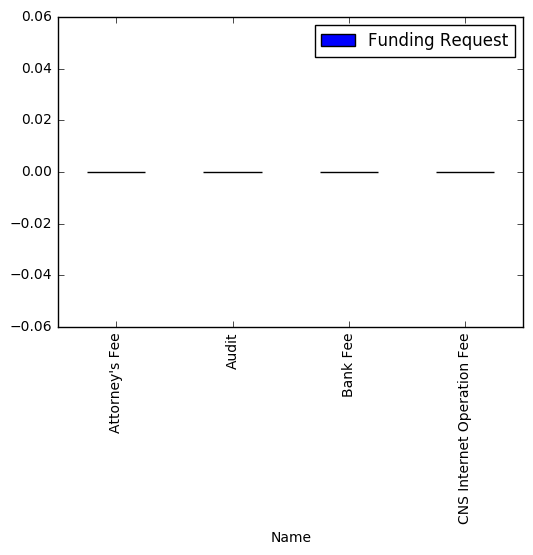

LEAD


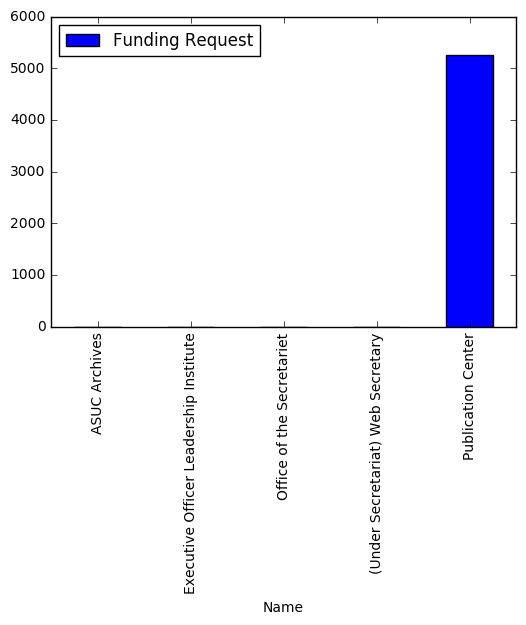

OP


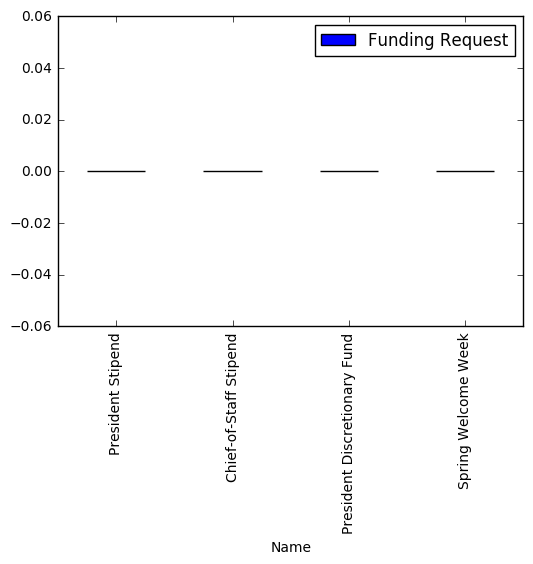

In [178]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    plt.figure()
    categories[i].plot.bar(x='Name',y='Funding Request')
    plt.show()

Roll Up on Org

# Money Requested vs. Allocated by Organization Type

PUB


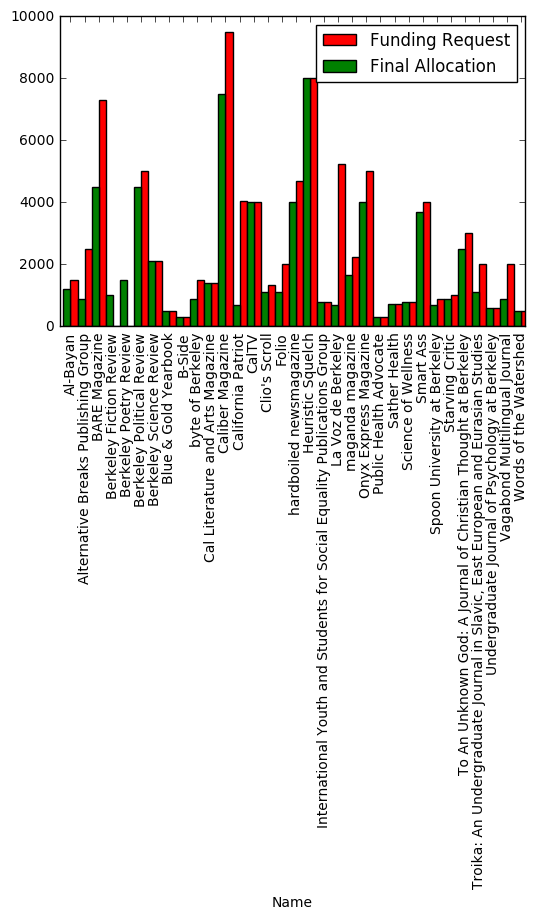

1    NaN
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


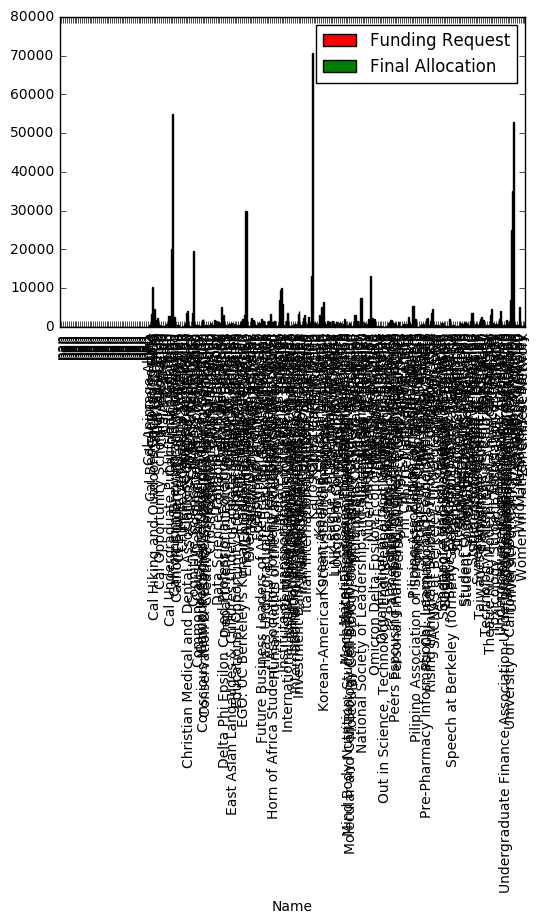

1     NaN
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


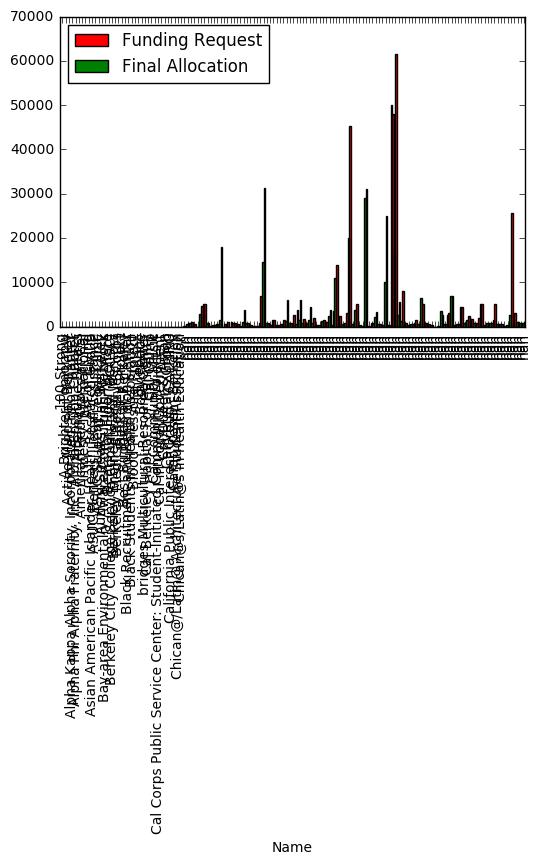

ASUC


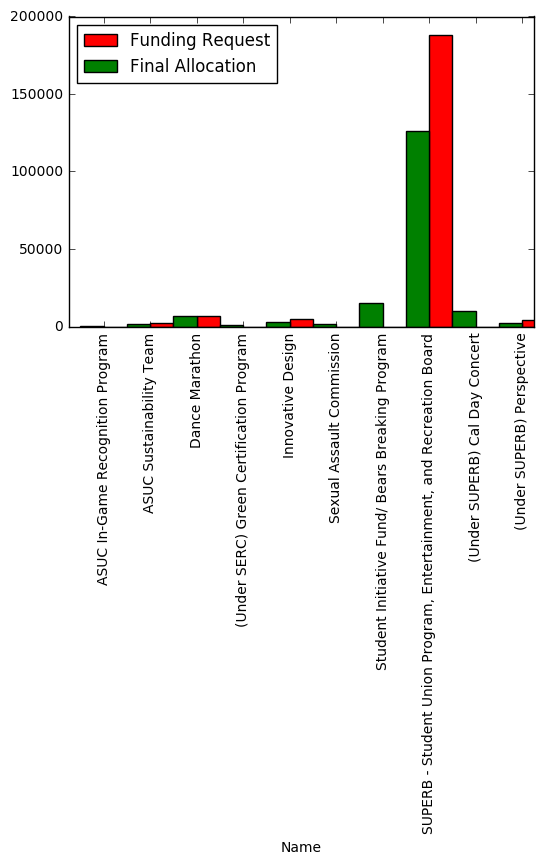

ASUC


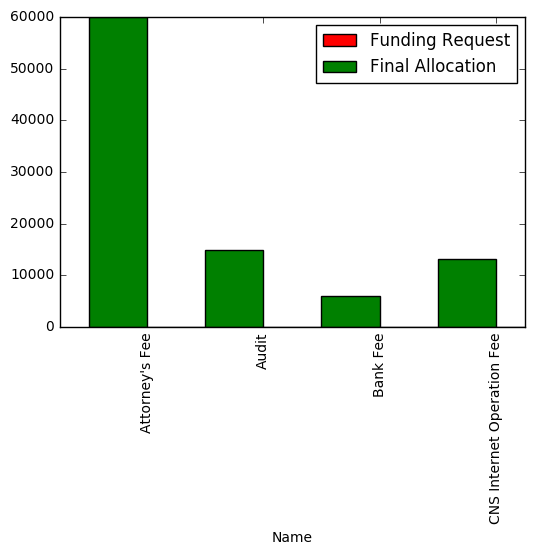

LEAD


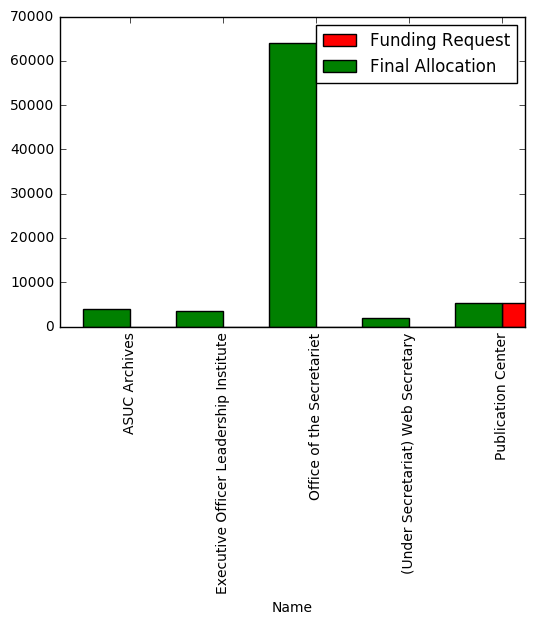

OP


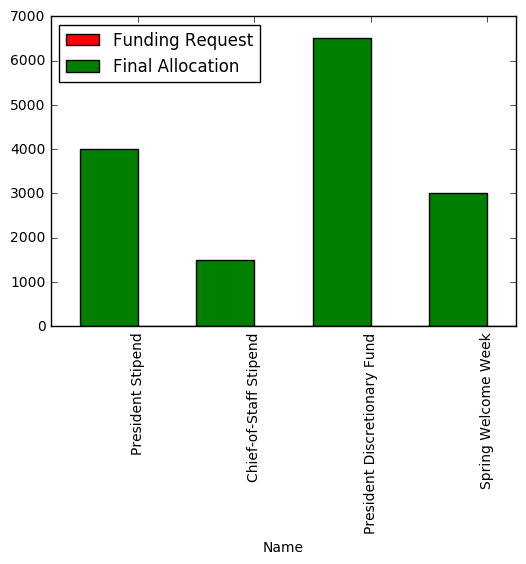

In [179]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='Name',y='Funding Request')
    categories[i].plot(kind='bar', color='green', ax=ax, position=1, x='Name',y='Final Allocation')
    plt.show()

# Difference in Money Requested vs. Allocated by Organization Type

PUB


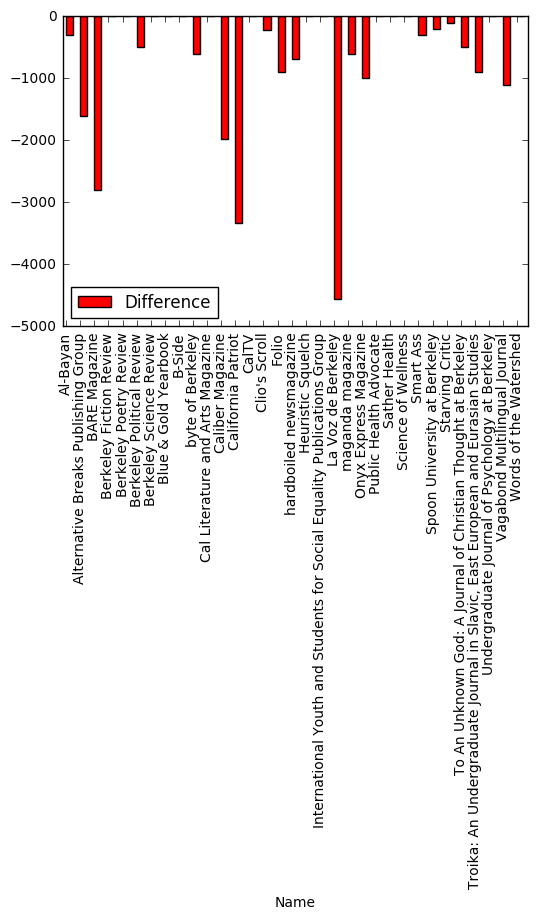

1    NaN
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object


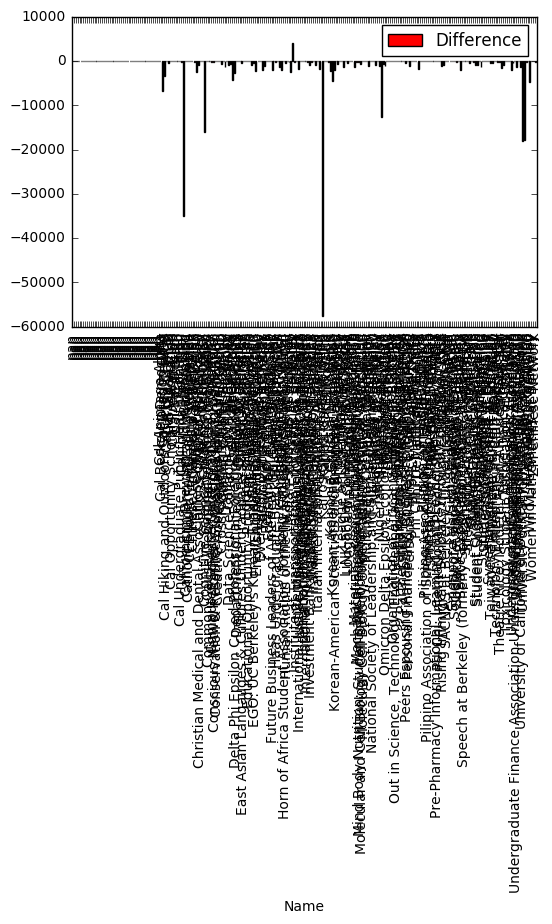

1     NaN
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object


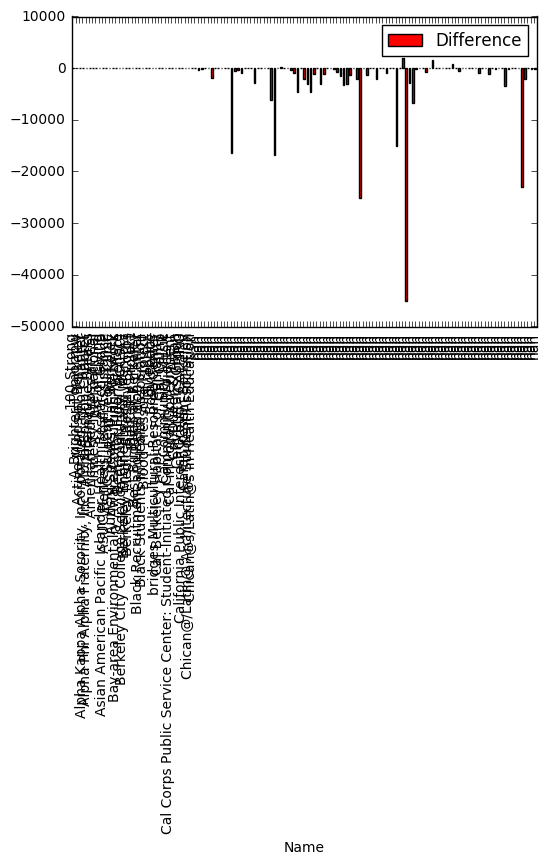

ASUC


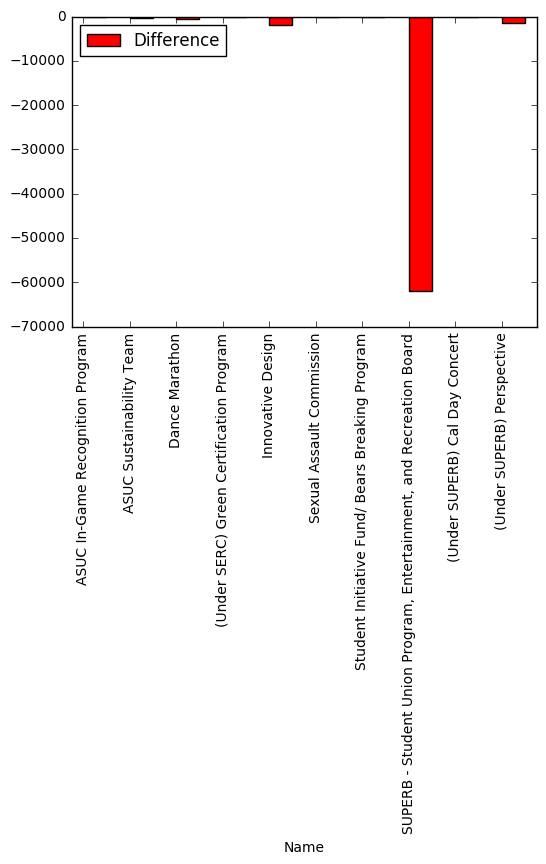

ASUC


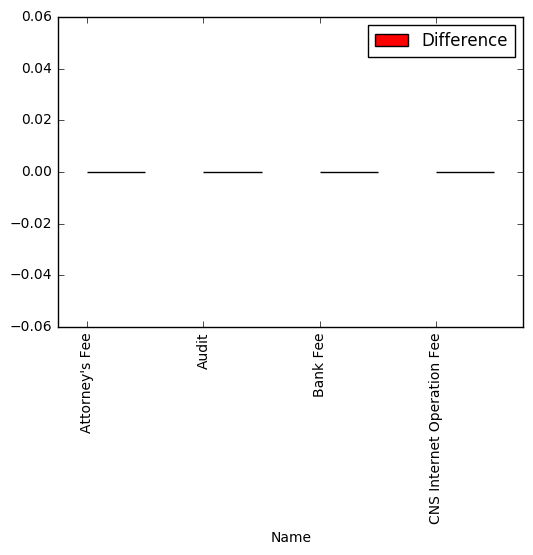

LEAD


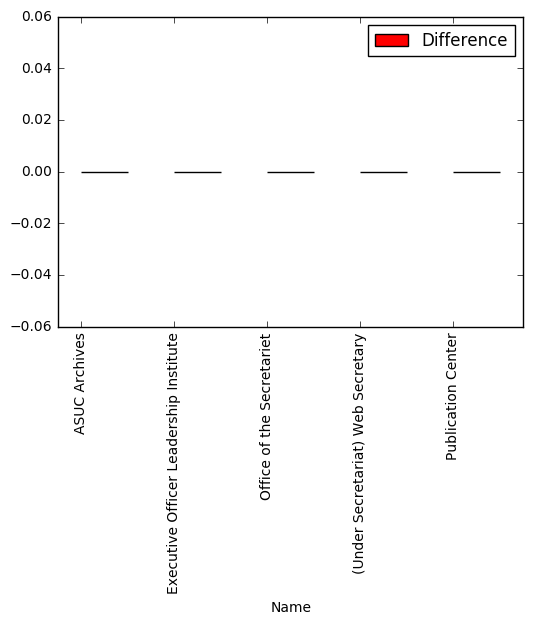

OP


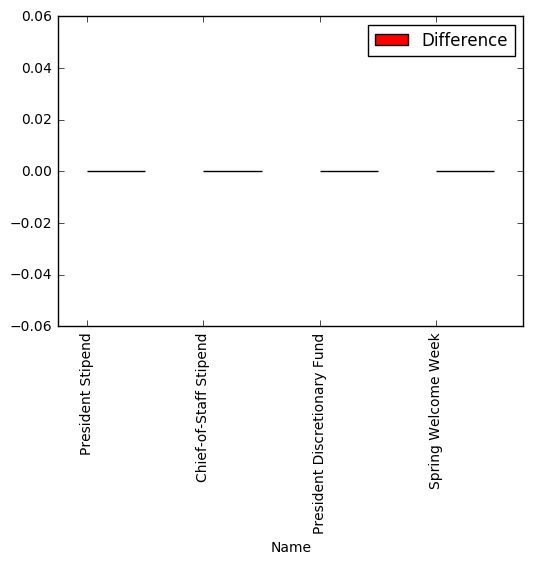

In [180]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='Name',y='Difference')
    plt.show()

# Top 10 Differences in Money Requested vs. Allocated by Organization Type

PUB
0                                 Name Type Years of Sponsorship  \
1                             Al-Bayan  PUB                   14   
2  Alternative Breaks Publishing Group  PUB                   12   
3                        BARE Magazine  PUB                    8   
4              Berkeley Fiction Review  PUB                   31   
5               Berkeley Poetry Review  PUB                   20   

0  Funding Request  Finance Officer  Finance Committee  Final Allocation  \
1           1500.0           1200.0             1200.0            1200.0   
2           2500.0            900.0              900.0             900.0   
3           7300.0           1500.0             4500.0            4500.0   
4              NaN           1000.0             1000.0            1000.0   
5              NaN           1000.0             1500.0            1500.0   

0  Difference  
1      -300.0  
2     -1600.0  
3     -2800.0  
4         NaN  
5         NaN  
0                                 

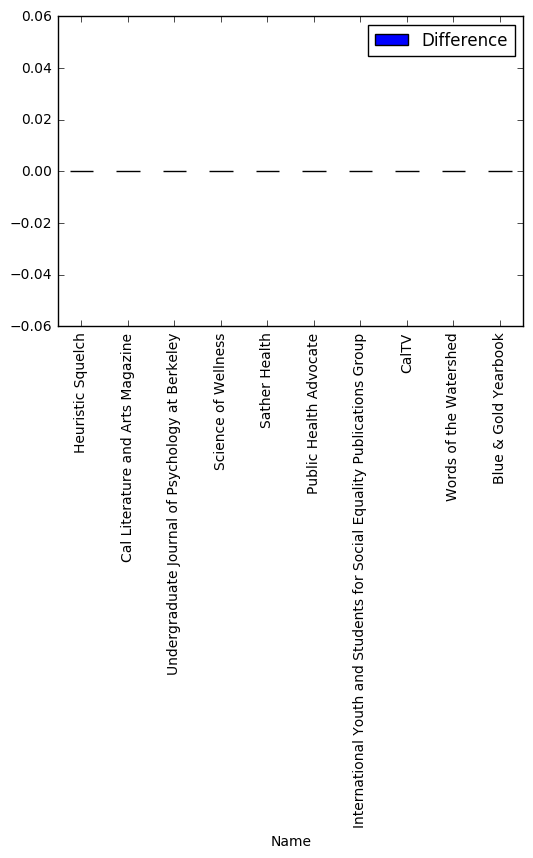

1    NaN
1    SAG
1    SAG
1    SAG
1    SAG
1    SAG
Name: Type, dtype: object
  Name Type Years of Sponsorship  Funding Request  Finance Officer  \
1  NaN  NaN                  NaN              NaN              NaN   
2  NaN  NaN                  NaN              NaN              NaN   
3  NaN  NaN                  NaN              NaN              NaN   
4  NaN  NaN                  NaN              NaN              NaN   
5  NaN  NaN                  NaN              NaN              NaN   

   Finance Committee  Final Allocation                              0    1  \
1                NaN               NaN                      [make]new  SAG   
2                NaN               NaN               3D Modeling Club  SAG   
3                NaN               NaN  4Corners Christian Fellowship  SAG   
4                NaN               NaN                    Abba Modern  SAG   
5                NaN               NaN                Acts2fellowship  SAG   

    2          4          5   

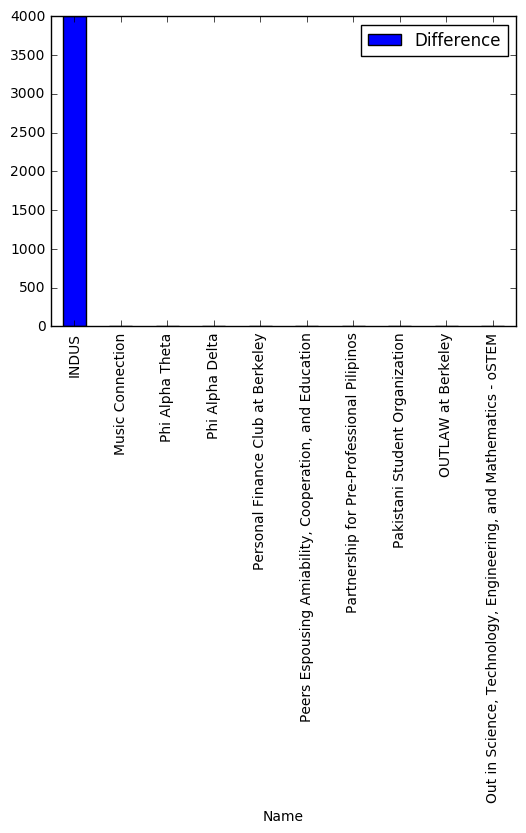

1     NaN
1    SISG
1    SISG
1    SISG
Name: Type, dtype: object
                                                Name     1   2          4  \
1                                         100 Strong  SISG   1  $1,000.00   
2                                A Brighter Tomorrow  SISG   2    $635.00   
3                           Active Minds at Berkeley  SISG   1    $130.00   
4  Alpha Kappa Alpha Sorority, Incorporated, Rho ...  SISG   1  $1,000.00   
5  Alpha Phi Alpha Fraternity, Inc. Alpha Epsilon...  SISG  12  $2,000.00   

           5          6          7 STUDENT-INITIATED SERVICE GROUPS Type  \
1    $300.00    $300.00    $300.00                              NaN  NaN   
2    $500.00    $500.00    $500.00                              NaN  NaN   
3    $130.00    $130.00    $130.00                              NaN  NaN   
4    $300.00    $300.00    $300.00                              NaN  NaN   
5  $2,000.00  $2,000.00  $2,000.00                              NaN  NaN   

  Years of Spo

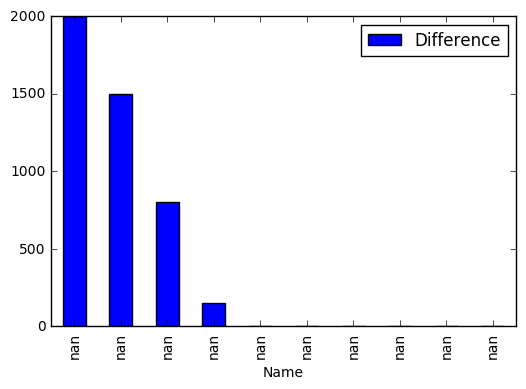

ASUC
0                                      Name  Type Years of Sponsorship  \
1          ASUC In-Game Recognition Program  ASUC                  NaN   
2                  ASUC Sustainability Team  ASUC                  NaN   
3                            Dance Marathon  ASUC                  NaN   
4  (Under SERC) Green Certification Program  ASUC                  NaN   
5                         Innovative Design  ASUC                  NaN   

0  Funding Request  Finance Officer  Finance Committee  Final Allocation  \
1              NaN              NaN                NaN             500.0   
2           2000.0           1400.0             1600.0            1600.0   
3           7000.0           6500.0             6500.0            6500.0   
4              NaN           1000.0             1000.0            1000.0   
5           5000.0           2000.0             3000.0            3000.0   

0  Difference  
1         NaN  
2      -400.0  
3      -500.0  
4         NaN  
5     -2000.0

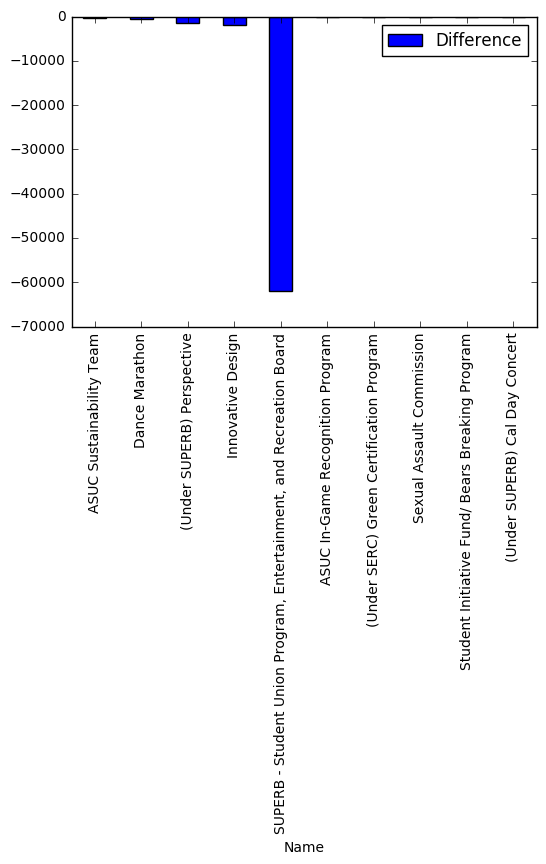

ASUC
0                        Name  Type  Funding Request  Finance Officer  \
1              Attorney's Fee  ASUC              NaN          60000.0   
2                       Audit  ASUC              NaN          15000.0   
3                    Bank Fee  ASUC              NaN              NaN   
4  CNS Internet Operation Fee  ASUC              NaN          13257.0   

0  Finance Committee  Final Allocation  Difference  
1            60000.0           60000.0         NaN  
2            15000.0           15000.0         NaN  
3                NaN            6000.0         NaN  
4            13257.0           13257.0         NaN  
0                        Name  Type  Funding Request  Finance Officer  \
1              Attorney's Fee  ASUC              NaN          60000.0   
2                       Audit  ASUC              NaN          15000.0   
3                    Bank Fee  ASUC              NaN              NaN   
4  CNS Internet Operation Fee  ASUC              NaN          13257.0   

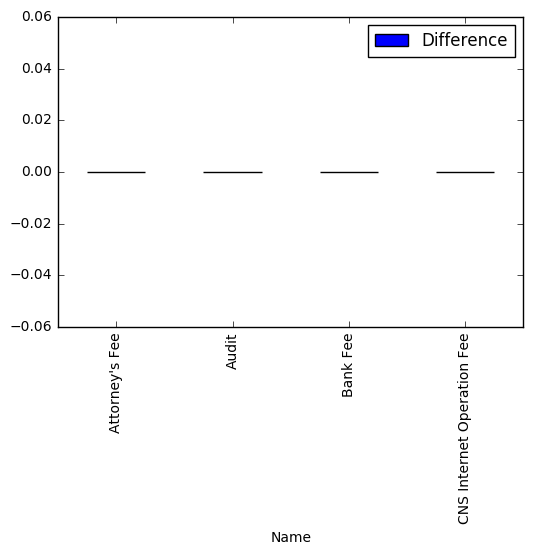

LEAD
0                                    Name  Type  Funding Request  \
1                           ASUC Archives  LEAD              NaN   
2  Executive Officer Leadership Institute  LEAD              NaN   
3               Office of the Secretariet  LEAD              NaN   
4       (Under Secretariat) Web Secretary  LEAD              NaN   
5                      Publication Center  LEAD           5250.0   

0  Finance Officer  Finance Committee  Final Allocation  Difference  
1           4000.0             4000.0            4000.0         NaN  
2           3500.0             3500.0            3500.0         NaN  
3          64000.0            64000.0           64000.0         NaN  
4           1000.0             2000.0            2000.0         NaN  
5           5250.0             5250.0            5250.0         0.0  
0                                    Name  Type  Funding Request  \
5                      Publication Center  LEAD           5250.0   
1                           AS

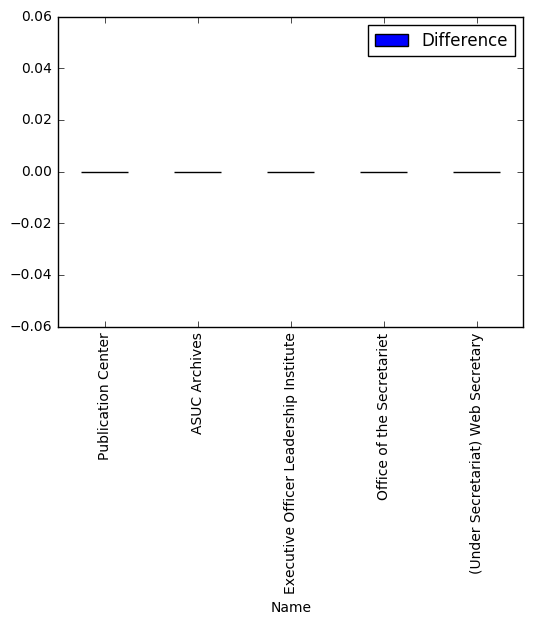

OP
0                          Name Type  Funding Request  Finance Officer  \
1             President Stipend   OP              NaN           4000.0   
2        Chief-of-Staff Stipend   OP              NaN           1500.0   
3  President Discretionary Fund   OP              NaN           6500.0   
4           Spring Welcome Week   OP              NaN           3000.0   

0  Finance Committee  Final Allocation  Difference  
1             4000.0            4000.0         NaN  
2             1500.0            1500.0         NaN  
3             6500.0            6500.0         NaN  
4             3000.0            3000.0         NaN  
0                          Name Type  Funding Request  Finance Officer  \
1             President Stipend   OP              NaN           4000.0   
2        Chief-of-Staff Stipend   OP              NaN           1500.0   
3  President Discretionary Fund   OP              NaN           6500.0   
4           Spring Welcome Week   OP              NaN           3

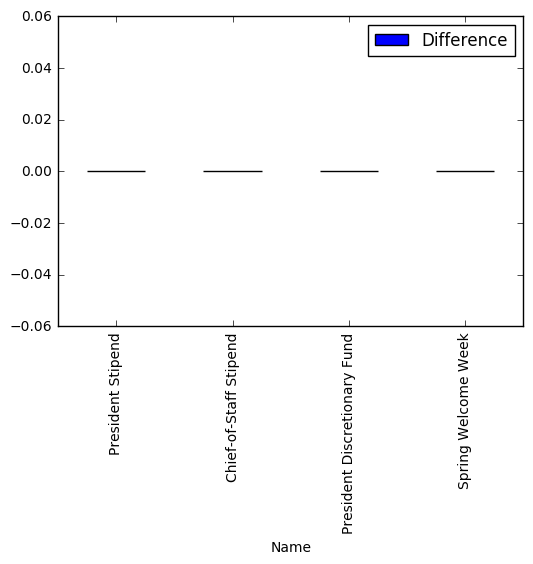

In [183]:
for i in range(len(categories)):
    print(categories[i]['Type'][1])
    
    plt.figure()
    print(categories[i].head())
    print(categories[i].sort_values(['Difference'], ascending=False, inplace=False)[0:10])
    print(categories[i].sort_values(['Difference'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='Name',y='Difference'))
    plt.show()

# Money Based on Age of Club (# of Years)

# Do Cultural Organizations Get More Money?
